# Introduction

This is a brief introduction to the [refractivesqlite package](https://github.com/HugoGuillen/refractiveindex.info-sqlite) developed by [Hugo Guillén](https://github.com/HugoGuillen). This package is a wrapper in Python 3 for the database of optical constants [refractiveindex.info](http://refractiveindex.info/) developed by [Mikhail Polyanskiy](https://github.com/polyanskiy). 

For better visualization, this tutorial can be downloaded as an interactive Jupyter Notebook [here](https://github.com/HugoGuillen/refractiveindex.info-sqlite/blob/master/Tutorial.ipynb).

## Features
The principal functionality of this package is to allow offline/programmatically queries to the database such as:
- Create a local SQLite database from the refractiveindex yml folder.
- Create a local SQLite database from the refractiveindex.zip url.
- Search the local database pages by approximate or exact terms.
- Search material data (refractiveindex, extinctioncoefficient) by intervals.
- Execute custom SQL queries on the database.
- Export material data (refractiveindex, extinctioncoefficient) to numpy arrays or csv files.
- Get data (refractiveindex, extinctioncoefficient) at specified wavelengths.

## Scheme
The package creates a database with the [following scheme](https://github.com/HugoGuillen/refractiveindex.info-sqlite/blob/master/ER.PNG).

![Scheme](ER.PNG "Scheme")

The table ``pages`` contains information about the materials; ``refractiveindex``  and ``extcoeff`` are self explanatory.

# Features
## Create the database

Note: once created, you don't need to create the DB again!
In both methods you can specify the interpolation_points for the case when *n* is expressed as a formula and *k* is not defined.

### Create from a custom URL 
You can find the .zip file of a version [here](http://refractiveindex.info/download.php). For example, to load the version 2016-05-25:

In [22]:
%load_ext autoreload
%autoreload 2
from refractivesqlite import dboperations as DB
import numpy as np
import matplotlib.pyplot as plt


dbpath = "refractive.db"
db = DB.Database(dbpath)
db.create_database_from_url(riiurl="http://refractiveindex.info/download/database/rii-database-2020-01-19.zip")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Database file found at refractive.db
Making request to http://refractiveindex.info/download/database/rii-database-2020-01-19.zip
Downloaded and extracting...
Wrote /database from http://refractiveindex.info/download/database/rii-database-2020-01-19.zip
LOG: 560,main,ZnS,Amotchkina : Bad Material YAML File.
***Wrote SQLite DB on  refractive.db


## Searches

### List all pages

In [35]:
db.search_pages('Quartz')

1 results found.
pageid	shelf	book	page	filepath	hasrefractive	hasextinction	rangeMin	rangeMax	points
2752	3d	crystals	quartz	main/SiO2/Malitson.yml	1	0	0.21	6.7	100


[2752]

### Search pages by term

In [38]:
# db.search_pages("otanicar")
# By exact term
indexes = db.search_pages('Quartz')
# By refractive interval
# db.search_n(n=0.3,delta_n=.0001)
# # Search materials by extinction coefficient (*k*) interval
# db.search_k(k=0.3,delta_k=.0001)
# # Search materials by *n,k* interval
# db.search_nk(n=0.3, delta_n=0.1,k=0.3,delta_k=0.1)
print(indexes)

1 results found.
pageid	shelf	book	page	filepath	hasrefractive	hasextinction	rangeMin	rangeMax	points
2752	3d	crystals	quartz	main/SiO2/Malitson.yml	1	0	0.21	6.7	100
[2752]


### Load material by Id

6 results found.
pageid	shelf	book	page	filepath	hasrefractive	hasextinction	rangeMin	rangeMax	points
191	main	CaF2	Malitson	main/CaF2/Malitson.yml	1	0	0.23	9.7	100
192	main	CaF2	Daimon-20	main/CaF2/Daimon-20.yml	1	0	0.138	2.326	100
193	main	CaF2	Daimon-25	main/CaF2/Daimon-25.yml	1	0	0.138	2.326	100
194	main	CaF2	Li	main/CaF2/Li.yml	1	0	0.15	12.0	100
195	main	CaF2	Kaiser	main/CaF2/Kaiser.yml	1	1	10.0	80.0	1401
898	glass	SCHOTT-multipurpose	LITHOTEC-CAF2	glass/schott/LITHOTEC-CAF2.yml	1	1	0.25	2.5	30
Material main/CaF2/Malitson.yml loaded.
OrderedDict([('pageid', 191), ('shelf', 'main'), ('book', 'CaF2'), ('page', 'Malitson'), ('filepath', 'main/CaF2/Malitson.yml'), ('hasrefractive', 1), ('hasextinction', 0), ('rangeMin', 0.23), ('rangeMax', 9.7), ('points', 100)])


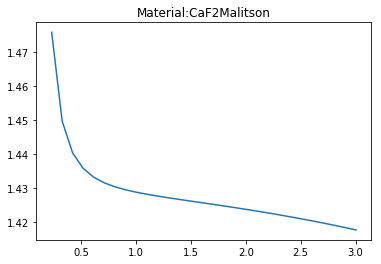

In [54]:
indexes = db.search_pages('CaF2')
mat = db.get_material(indexes[0])
h = mat.get_page_info()
ref_data = mat.get_complete_refractive()
wlen = np.array(ref_data)[:30,0]
n = np.array(ref_data)[:30,1]
plt.plot(wlen, n)
plt.title('Material:'+h['book']+h['page'])
print(h)

### Get all material extinction coefficient data

In [ ]:
k = mat.get_complete_extinction()
print(k)

### Get all material extinction coefficient data as a numpy array

In [ ]:
import numpy as np
k = np.array(mat.get_complete_extinction())
print(k)

In [44]:
minerals = ['fluorite', 'analcime', 'orthoclase', 'microcline', 'albite (plagioclase)', 'oligoclase (plagioclase)', 'nepheline', 'cordierite', 
'andesine (plagioclase)', 'quartz', 'labradorite (plagioclase)', 'calcite', 'bytowonite (plagioclase)', 'muscovite', 'anorthite (plagioclase)',
'tremolite (amphibole)', 'anthophyllite (orthoamphibol e)', 'actinolite(amphibole)', 'apatite', 'andalusite', 'olivine', 'sillimanite',
'orthopyroxene', 'diopside-augiteclinopyroxene', 'spinel', 'kyanite', 'epidote', 'garnet', 'titanite', 'zircon', 'biotite', 'chlorite',
'actinolite (amphibole)', 'hornblende (amphibole)', 'clinopyroxene', 'orthopyroxene', 'spinel', 'epidote', 'aegirine (clinopyroxene)',
'tourmaline', 'epidote', 'staurolite', 'rutile', 'biotite', 'tourmaline', 'brown', 'amphibole', 'augite,', 'titanian (clinopyroxe ne)',
'spinel', 'garnet', '(melanite)', 'titanite', 'rutile', 'fluorite', 'glaucophane (amphibole)', 'tourmaline', 'Na amphiboles', 'garnet',
'orthopyroxene', 'hematite', 'andalusite', 'sericite', 'iddingsite', 'serpentine', 'uralite', 'leucoxene', 'limonite']


In [65]:
db.search_pages('sio2')

17 results found.
pageid	shelf	book	page	filepath	hasrefractive	hasextinction	rangeMin	rangeMax	points
428	main	SiO2	Malitson	main/SiO2/Malitson.yml	1	0	0.21	6.7	100
429	main	SiO2	Popova	main/SiO2/Popova.yml	1	1	7.0	50.0	200
430	main	SiO2	Ghosh-o	main/SiO2/Ghosh-o.yml	1	0	0.198	2.0531	100
431	main	SiO2	Ghosh-e	main/SiO2/Ghosh-e.yml	1	0	0.198	2.0531	100
432	main	SiO2	Radhakrishnan-o	main/SiO2/Radhakrishnan-o.yml	1	0	0.18	3.0	100
433	main	SiO2	Radhakrishnan-e	main/SiO2/Radhakrishnan-e.yml	1	0	0.18	3.0	100
434	main	SiO2	Kischkat	main/SiO2/Kischkat.yml	1	1	1.53846	14.28571	1451
435	main	SiO2	Rodriguez-de_Marcos	main/SiO2/Rodriguez-de Marcos.yml	1	1	0.0299714	1.51066	395
436	main	SiO2	Gao	main/SiO2/Gao.yml	1	1	0.252	1.25	500
437	main	SiO2	Lemarchand	main/SiO2/Lemarchand.yml	1	1	0.25	2.5	451
639	main	Bi12SiO20	Gospodinov	main/Bi12SiO20/Gospodinov.yml	1	0	0.48	0.7	100
882	glass	fused_silica	Malitson	main/SiO2/Malitson.yml	1	0	0.21	6.7	100
899	glass	HIKARI-multipurpose	NIFS-A	hikari/SiO2/NIFS-

[428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 639,
 882,
 899,
 900,
 901,
 902,
 2752]

In [50]:
minerals[9]

'quartz'